Quote from: "Stochastic Simulation of Chemical Kinetics" Daniel T. Gillespie (2007)


If $R_j$ is a bimolecular reaction of the form $S_1 + S_2 \rightarrow$ product(s), kinetic theory
arguments and the well-stirred condition together imply the existence of a constant $c_j$,
such that $c_j dt$ gives the probability that a randomly chosen pair of S1 and S2 molecules
will react according to $R_j$ in the next infinitesimal time $dt$ (8–11). The probability
that some one of the $x_1x_2$ $S_1-S_2$ pairs inside  will react according to $R_j$ in the next
$dt$ is therefore $x_1x_2 \,c_j dt$, and that implies that the propensity function in Equation 2
is $a_j(x) = c_jx_1x_2$. If instead the bimolecular reaction had been $S_1 + S_1 \rightarrow$ product(s),
we would have reckoned the number of distinct $S_1$ molecular pairs as $\frac{1}{2} x_1(x_1 −1)$, and so obtained for the propensity function $a_j(x) = cj \frac{1}{2}x_1(x_1 − 1)$.

...

unimolecular $c_j$ is independent of the system volume $\Omega$, a bimolecular $c_j$ is inversely
proportional to $\Omega$, reflecting the fact that two reactant molecules will have a harder
time finding each other inside a larger volume. It turns out that for a unimolecular
reaction, $c_j$ is numerically equal to the reaction-rate constant $k_j$ of conventional deterministic chemical kinetics, whereas for a bimolecular reaction, $c_j$ is equal to $k_j/\Omega$ if the
reactants are different species, or $2k_j/\Omega$ if they are the same species (8–11).

-----------------------------------------------------------

Using the above formulation for $A + B \rightleftharpoons 2 A$, we get:

$a_{forward} = \dfrac{k_j}{\Omega}\,A\,B $


$a_{reverse} = \dfrac{2\,k_j}{\Omega}\dfrac{1}{2}\,A\,(A-1) $

In [1]:
import os
import sys
sys.path.insert(1, os.path.abspath(os.path.join(os.getcwd(), '../..')))

In [2]:
import matplotlib.pyplot as plt

In [3]:
import gillespy2

In [19]:
def create_model(A=1, B=999):
    # Initialize Model
    model = gillespy2.Model(name="Bimolecular_test")
    model.add([
        #species
        gillespy2.Species(name="A", initial_value=A, 
                          mode="discrete"),
        gillespy2.Species(name="B", initial_value=B, 
                          mode="discrete"),
        #parameters
        gillespy2.Parameter(name="r_fwd", expression="0.01"),
        gillespy2.Parameter(name="r_rev", expression="0.01"),
        #reactions
        gillespy2.Reaction(name='forward',
            reactants={'A':1, 'B':1},
            products={'A':2},
            rate='r_fwd'),
        gillespy2.Reaction(name='reverse',
            reactants={'A':2},
            products={'A':1, 'B':1},
            rate='r_rev'
            #propensity_function="((((r_rev)*A)*(A-1))/vol)"              
                          ),
        gillespy2.TimeSpan.arange(t=10,increment=0.1)
    ])
    return model


In [20]:
model = create_model(A=999,B=1)

In [21]:
%time result = model.run()

CPU times: user 1.91 ms, sys: 12 ms, total: 13.9 ms
Wall time: 2.81 s


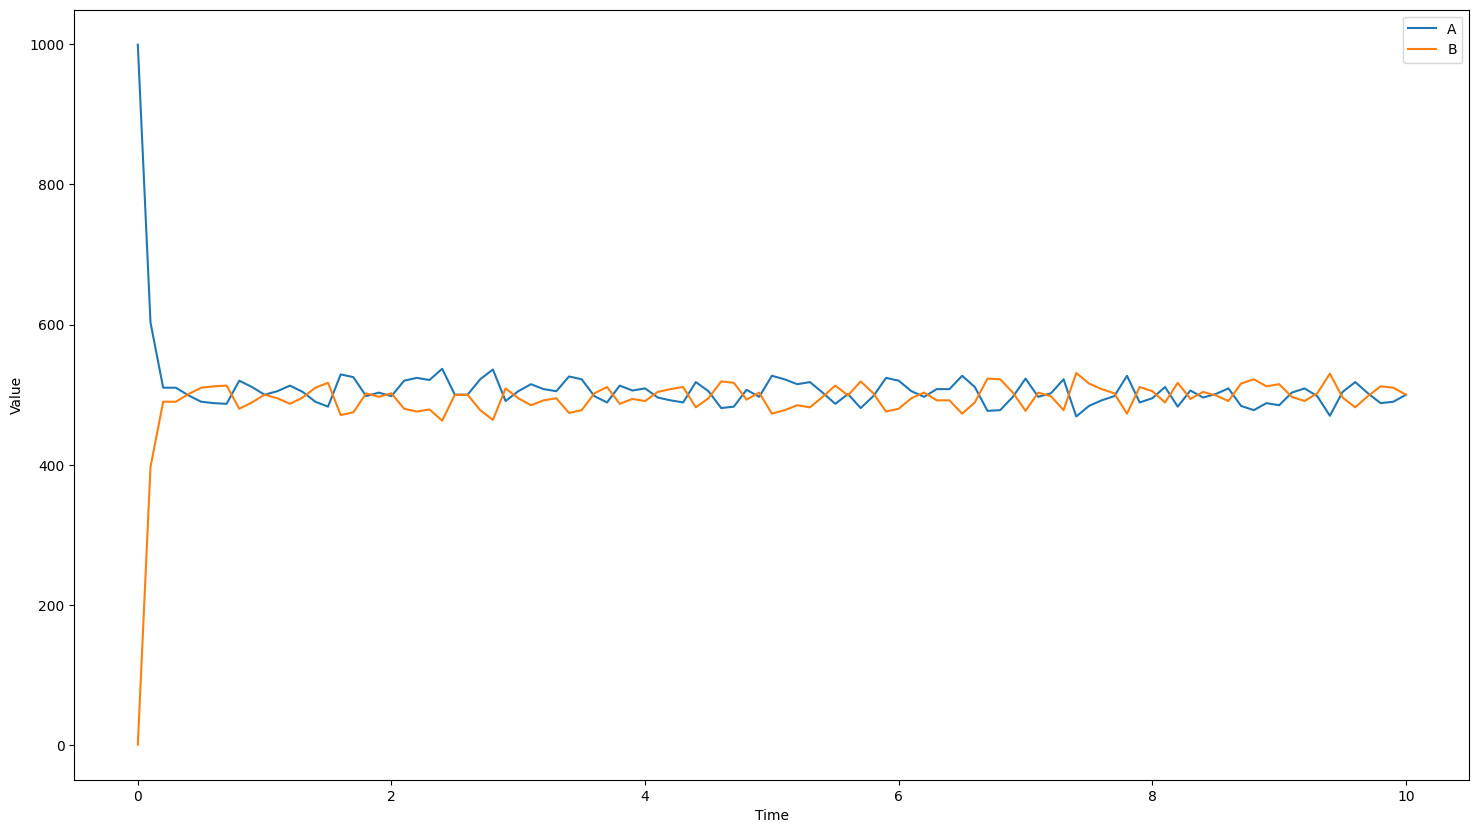

In [22]:
result.plot()

In [23]:
print(model)

Bimolecular_test

**********
Species
**********

A: 999
B: 1

**********
Parameters
**********

r_fwd: 0.01
r_rev: 0.01

**********
Reactions
**********

forward
	Reactants
		A: 1
		B: 1
	Products
		A: 2
	Propensity Function: (((r_fwd*A)*B)/vol)
reverse
	Reactants
		A: 2
	Products
		A: 1
		B: 1
	Propensity Function: (((r_rev*A)*(A-1))/vol)

**********
Timespan
**********
[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10. ]
